In [1]:
# 从 google.colab 库中导入 drive 模块
# 这个模块提供了与 Google Drive 交互的功能，例如挂载（mount）文件系统
from google.colab import drive
# 调用 drive 模块的 mount 方法将 Google Drive 挂载到 Colab 的虚拟机上
# '/content/gdrive' 是挂载的目标路径，挂载成功后，Google Drive 的内容将可以在此路径下访问
# 执行这行代码会弹出一个授权提示，需要用户登录 Google 账号并授权访问 Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# 导入 pandas 库并简写为 pd
# pandas 是 Python 中用于数据处理和分析的强大库，主要提供 DataFrame 等数据结构
import pandas as pd

# 导入 numpy 库并简写为 np
# numpy 是 Python 的科学计算基础库，提供了高效的多维数组对象和丰富的数学函数
import numpy as np

# 导入 matplotlib 的 pyplot 模块并简写为 plt
# matplotlib 是 Python 最基础的绘图库，pyplot 模块提供了类似 MATLAB 的绘图接口，用于创建静态、动态、交互式可视化
import matplotlib.pyplot as plt

# 导入 seaborn 库并简写为 sns
# seaborn 是基于 matplotlib 的高级数据可视化库，提供更美观和信息丰富的统计图表
import seaborn as sns

# 从 sklearn (scikit-learn) 库中导入 tree 模块
# sklearn 是 Python 最流行的机器学习库，tree 模块包含了决策树相关的算法，如 DecisionTreeClassifier 和 DecisionTreeRegressor
from sklearn import tree

### 获取数据

In [3]:
# 使用 pandas 的 read_csv() 函数从指定路径读取 CSV 文件
# 文件路径指向 Google Drive 挂载目录中的 'new_data.csv' 文件
# 读取的数据被加载到一个名为 'new_data' 的 DataFrame 对象中
new_data = pd.read_csv("/content/gdrive/MyDrive/ElectricPowerTraining/data/new_data.csv")

# 从 DataFrame 'new_data' 中删除名为 'Unnamed: 0' 的列
# axis=1 表示按列删除（axis=0表示按行删除）
# 'Unnamed: 0' 列通常是 CSV 文件在保存时自动生成的索引列，对分析无用故删除
new_data = new_data.drop('Unnamed: 0', axis=1)

# 使用 info() 方法显示 DataFrame 'new_data' 的简明摘要信息
# info() 提供的信息包括：列名、非空值数量、每列的数据类型以及内存使用情况
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75552 entries, 0 to 75551
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   value                 75552 non-null  float64
 1   weather_status        75552 non-null  float64
 2   temperature           75552 non-null  float64
 3   humidity              75552 non-null  float64
 4   wind_speed            75552 non-null  float64
 5   wind_direction_angle  75552 non-null  float64
 6   pressure              75552 non-null  float64
 7   visibility            75552 non-null  float64
 8   precipitation         75552 non-null  float64
 9   light                 75552 non-null  float64
 10  holiday               75552 non-null  float64
 11  minute                75552 non-null  float64
 12  week                  75552 non-null  float64
 13  year                  75552 non-null  float64
dtypes: float64(14)
memory usage: 8.1 MB


In [4]:
# 使用 astype(np.float32) 方法将 DataFrame 'new_data' 中所有列的数据类型转换为 np.float32
# np.float32 是 NumPy 的 32 位浮点数类型，相比默认的 64 位浮点数 (float64) 占用内存更少
# 这种转换通常用于：1. 减少内存占用（尤其在处理大型数据集时）；2. 某些深度学习框架对 32 位浮点数有更好的支持；3. 当数据精度要求不高时
new_data = new_data.astype(np.float32)

# 再次调用 info() 方法查看 DataFrame 的详细信息
# 此时可以看到各列的数据类型已经变为 float32，并且可能会观察到内存使用量有所减少
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75552 entries, 0 to 75551
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   value                 75552 non-null  float32
 1   weather_status        75552 non-null  float32
 2   temperature           75552 non-null  float32
 3   humidity              75552 non-null  float32
 4   wind_speed            75552 non-null  float32
 5   wind_direction_angle  75552 non-null  float32
 6   pressure              75552 non-null  float32
 7   visibility            75552 non-null  float32
 8   precipitation         75552 non-null  float32
 9   light                 75552 non-null  float32
 10  holiday               75552 non-null  float32
 11  minute                75552 non-null  float32
 12  week                  75552 non-null  float32
 13  year                  75552 non-null  float32
dtypes: float32(14)
memory usage: 4.0 MB


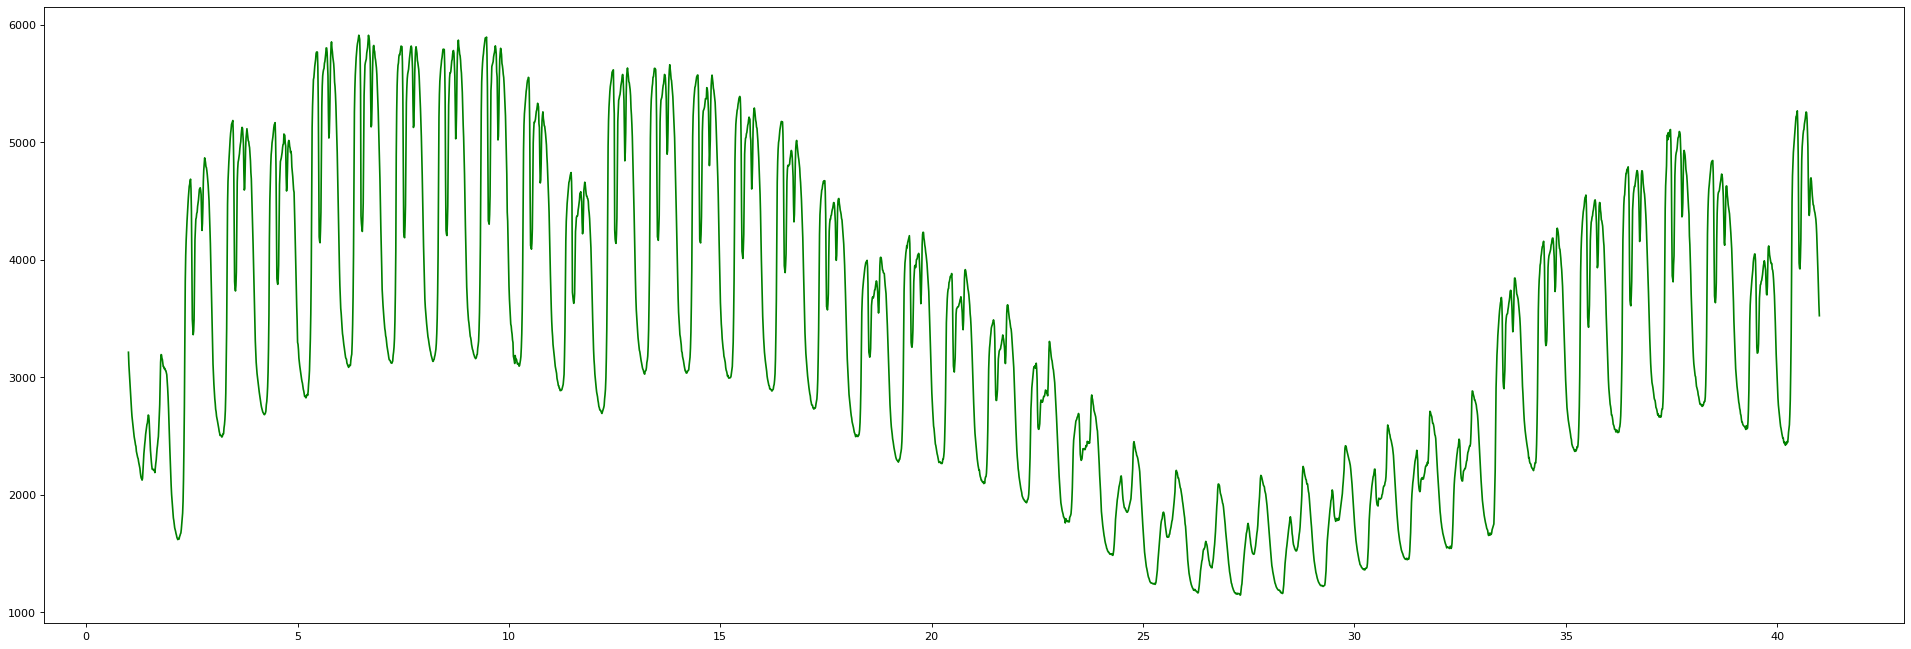

In [5]:
# 设置图形窗口的大小为30x10英寸，并设置DPI（每英寸点数）为80，以保证图像清晰度
plt.figure(figsize=(30, 10), dpi=80)

# 生成X轴坐标，代表时间点
# np.linspace(start, stop, num, endpoint=True) 在指定区间内生成均匀间隔的数值
# 从1到41（代表40天，因为包含结束点41），共生成 96 * 40 个数据点（假设每天有96个数据点）
X = np.linspace(1, 41, 96 * 40, endpoint=True)

# 绘制折线图
# X轴为时间点，Y轴为 'new_data' DataFrame 中 'value' 列的前 96 * 40 个数据点
# 曲线颜色设置为绿色
plt.plot(X, np.array(new_data['value'])[: 96 * 40], color='green')

# 显示绘制的图形
plt.show()

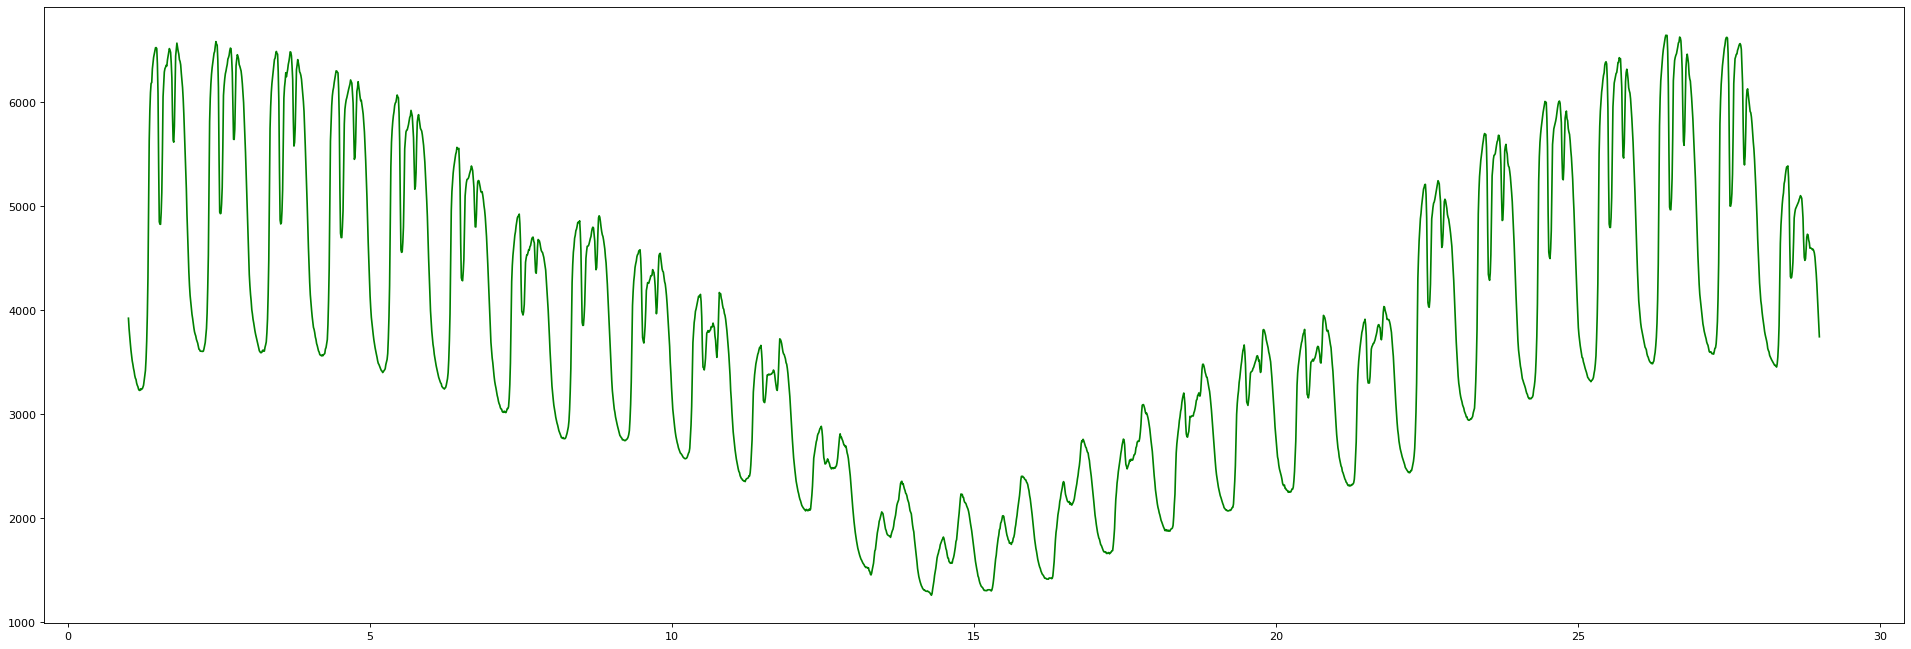

In [6]:
# 设置图形窗口的大小为30x10英寸，DPI为80
plt.figure(figsize=(30, 10), dpi=80)

# 生成X轴坐标，代表时间点
# 从1到29（代表28天），共生成 96 * 28 个均匀间隔的数据点
X = np.linspace(1, 29, 96 * 28, endpoint=True)

# 绘制折线图
# X轴为时间点，Y轴为 'new_data' DataFrame 中 'value' 列从索引38016开始的 96 * 28 个数据点
# 曲线颜色设置为绿色
plt.plot(X, np.array(new_data['value'])[38016: 38016+96 * 28], color='green')

# 显示绘制的图形
plt.show()

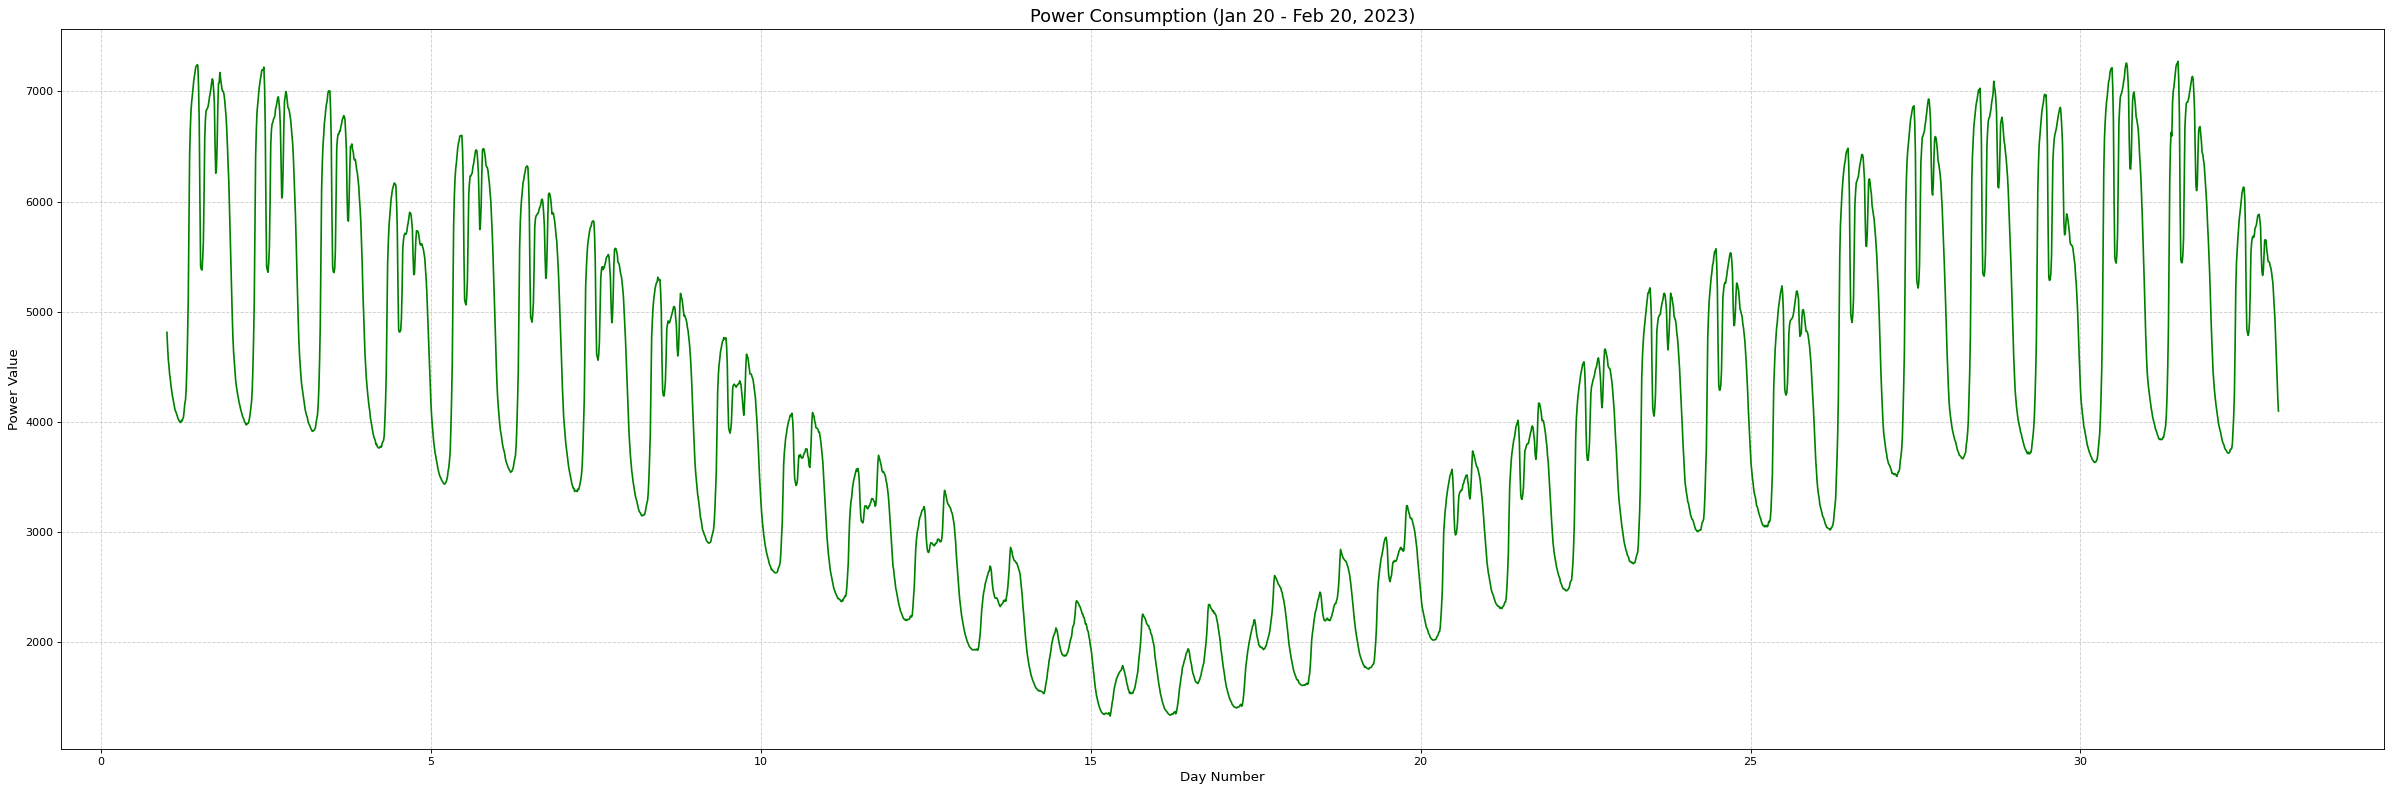

In [7]:
# 设置图形窗口的大小为30x10英寸，DPI为80
plt.figure(figsize=(30, 10), dpi=80)

# 生成X轴坐标，代表时间点
# 从1到33（代表32天），共生成 96 * 32 个均匀间隔的数据点
X = np.linspace(1, 33, 96 * 32, endpoint=True)

# 绘制折线图
# X轴为时间点，Y轴为 'new_data' DataFrame 中 'value' 列从索引71904开始的 96 * 32 个数据点
# 曲线颜色设置为绿色
plt.plot(X, np.array(new_data['value'])[71904: 71904+96 * 32], color='green')

# 添加图形标题，设置字体大小
plt.title('Power Consumption (Jan 20 - Feb 20, 2023)', fontsize=16)
# 添加X轴标签，设置字体大小
plt.xlabel('Day Number', fontsize=12)
# 添加Y轴标签，设置字体大小
plt.ylabel('Power Value', fontsize=12)
# 添加网格线，设置样式为虚线，透明度为0.6
plt.grid(True, linestyle='--', alpha=0.6)

# 自动调整子图参数，以确保布局紧凑，避免标签重叠
plt.tight_layout()

# 显示绘制的图形
plt.show()

2021年、2022年、2023年年初电力负荷均出现了明显的先下降后上升过程，但原因不明，需要和电力公司沟通，了解原因。因此在模型训练和测试时选择将这段时间的数据忽略。

删去2021-1-21到2021-2-6，2022-2-9到2022-2-24，2023-1-26到2023-2-13的数据

In [8]:
# 创建一个列表，包含要删除的行索引范围
# range(start, end) 函数生成从 start 到 end-1 的整数序列
# 例如，range(1920, 3552) 包含了从1920到3551的索引
drop_index = [i for i in range(1920, 3552)] + \
             [i for i in range(38784, 40320)] + \
             [i for i in range(72480, 74304)]

# 从 DataFrame 'new_data' 中删除 'drop_index' 列表中指定的行
# axis=0 表示按行删除（这是默认值，也可省略）
# 该操作会返回一个新的 DataFrame，原始 DataFrame 不会被修改，所以需要重新赋值
new_data = new_data.drop(drop_index, axis=0)

# 打印处理后的 DataFrame 'new_data' 的详细信息
# 此时可以看到 DataFrame 的行数已经减少，反映了数据的删除操作
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70560 entries, 0 to 75551
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   value                 70560 non-null  float32
 1   weather_status        70560 non-null  float32
 2   temperature           70560 non-null  float32
 3   humidity              70560 non-null  float32
 4   wind_speed            70560 non-null  float32
 5   wind_direction_angle  70560 non-null  float32
 6   pressure              70560 non-null  float32
 7   visibility            70560 non-null  float32
 8   precipitation         70560 non-null  float32
 9   light                 70560 non-null  float32
 10  holiday               70560 non-null  float32
 11  minute                70560 non-null  float32
 12  week                  70560 non-null  float32
 13  year                  70560 non-null  float32
dtypes: float32(14)
memory usage: 4.3 MB


**所有数据用于决策树的训练**

In [9]:
# 准备训练数据：
# Xtrain: 特征矩阵，通过删除 'new_data' 中的 'value' 列获取所有特征列，并转换为 NumPy 数组
# Ytrain: 目标变量，即 'new_data' 中 'value' 列的值，并转换为 NumPy 数组
Xtrain = np.array(new_data.drop('value', axis=1))  # 训练特征矩阵
Ytrain = np.array(new_data['value'])              # 训练目标变量

# 初始化两个决策树回归器
# criterion="squared_error" 表示决策树在分裂节点时使用均方误差 (MSE) 作为评估标准
# 目标是最小化每个叶子节点内的均方误差
clf1 = tree.DecisionTreeRegressor(criterion="squared_error")
clf2 = tree.DecisionTreeRegressor(criterion="squared_error")

# 训练模型：使用相同的训练数据 (Xtrain, Ytrain) 拟合两个决策树回归器
# fit() 方法是 Scikit-learn 模型训练的标准方法
clf1 = clf1.fit(Xtrain, Ytrain)
clf2 = clf2.fit(Xtrain, Ytrain)

# 评估模型性能：计算模型在训练数据上的 R² 分数 (决定系数)
# R² 分数衡量模型解释目标变量方差的比例，范围通常在 0 到 1 之间
# 1 表示完美拟合，0 表示模型表现不比简单地使用目标变量的平均值更好
train_score1 = clf1.score(Xtrain, Ytrain)
train_score2 = clf2.score(Xtrain, Ytrain)

# 打印两个模型的训练集 R² 分数
print(train_score1, train_score2)

1.0 1.0


特征重要性原始值: [0.00555335 0.16018242 0.05472366 0.01023367 0.0095369  0.02679481
 0.03059548 0.00087962 0.01213932 0.04226685 0.52030617 0.07418707
 0.05260069]
weather_status: 0.0056
temperature: 0.1602
humidity: 0.0547
wind_speed: 0.0102
wind_direction_angle: 0.0095
pressure: 0.0268
visibility: 0.0306
precipitation: 0.0009
light: 0.0121
holiday: 0.0423
minute: 0.5203
week: 0.0742
year: 0.0526


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31216 (\N{CJK UNIFIED IDEOGRAPH-79F0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20915 (\N{CJK UNIFIED IDEOGRAPH-51B3}) missing from font(s) DejaVu Sans.
  fig.canvas

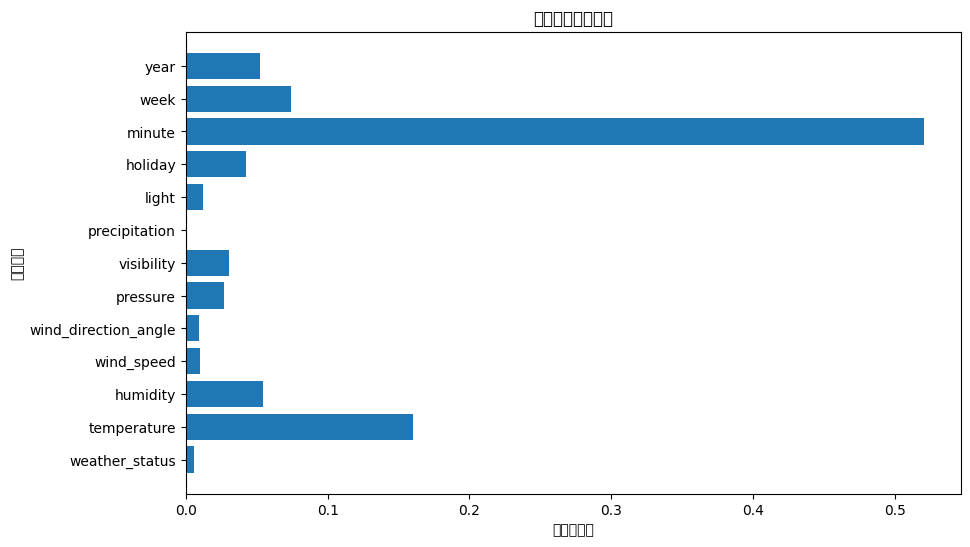

In [10]:
# 获取训练好的决策树模型 clf1 的特征重要性
# feature_importances_ 属性返回一个数组，其中每个元素代表对应特征的重要性分数
feature_importances = clf1.feature_importances_

# 打印原始的特征重要性分数数组
print("特征重要性原始值:", feature_importances)

# 获取特征名称列表
# 通过从 'new_data' DataFrame 中删除 'value' 列并获取剩余列名来获得特征名称
feature_names = new_data.drop('value', axis=1).columns
# 遍历特征名称和对应的重要性分数，并格式化打印输出
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance:.4f}") # 格式化输出，保留四位小数

# 可视化特征重要性：创建条形图
# 设置图形大小
plt.figure(figsize=(10, 6))
# 绘制横向条形图：Y轴为特征名称，X轴为重要性分数
plt.barh(feature_names, feature_importances)
# 设置图表标题
plt.title('决策树特征重要性')
# 设置X轴标签
plt.xlabel('重要性分数')
# 设置Y轴标签
plt.ylabel('特征名称')
# 显示图表
plt.show()

In [11]:
# 定义特征名称列表，包含中文和英文混合的名称
feature_name = ['weather_status', 'temperature', 'humidity(湿度)', 'wind_speed',
               'wind_direction_angle', 'pressure', 'visibility(可见度)',
               'precipitation(降水)', 'light', 'holiday', 'minute', 'week', 'year']

# 创建一个 Pandas DataFrame 来展示特征重要性
# 1. zip(feature_name, clf1.feature_importances_) 将特征名称和模型 clf1 的重要性分数配对
# 2. pd.DataFrame(...) 将配对结果转换为 DataFrame
# 3. set_index(0) 将 DataFrame 的第一列（特征名称）设置为索引
# 4. sort_values(by=1, ascending=False) 根据第二列（重要性分数）的值进行降序排序
pd.DataFrame(zip(feature_name, clf1.feature_importances_)).set_index(0).sort_values(by=1, ascending=False)

,1
0,
minute,0.520306
temperature,0.160182
week,0.074187
humidity(湿度),0.054724
year,0.052601
holiday,0.042267
visibility(可见度),0.030595
pressure,0.026795
light,0.012139


In [12]:
# 将特征名称与第二个决策树模型(clf2)的特征重要性分数进行组合和分析

# 1. 使用zip函数将特征名称列表(feature_name)与模型重要性分数(clf2.feature_importances_)配对
#    - feature_name: 包含所有特征名的列表
#    - clf2.feature_importances_: 决策树模型计算出的各特征重要性数组

# 2. 将配对后的数据转换为pandas DataFrame
#    - 此时DataFrame会有两列：第0列是特征名，第1列是重要性分数

# 3. 将第0列（特征名）设置为DataFrame的索引
#    - set_index(0): 使特征名成为行索引，方便查看

# 4. 按第1列（重要性分数）进行降序排序
#    - sort_values(by=1): 指定按重要性分数排序
#    - ascending=False: 降序排列（从最重要到最不重要）
pd.DataFrame(zip(feature_name, clf2.feature_importances_)).set_index(0).sort_values(by=1, ascending=False)

,1
0,
minute,0.519981
temperature,0.159894
week,0.074994
humidity(湿度),0.054466
year,0.052590
holiday,0.042284
visibility(可见度),0.029653
pressure,0.027142
light,0.012301


**2021年和2022年的数据作为训练集，2023年的数据作为测试集**

In [13]:
# 划分训练集和测试集：
# 将 DataFrame 'new_data' 拆分为两部分：
# - 训练集 (train): 从开始到索引 70079（包含 70079）
# - 测试集 (test): 从索引 70080 到末尾
train = new_data.loc[:70079]  # 获取前 70080 行作为训练集 (索引 0~70079)
test = new_data.loc[70080:]   # 获取 70080 行之后的数据作为测试集

# 准备训练数据：
# Xtrain: 训练特征矩阵（删除目标列 'value' 后的所有特征）
# Ytrain: 训练目标变量（'value' 列的值）
# 使用 np.array() 将 DataFrame 转换为 NumPy 数组，以提高后续机器学习算法的处理效率
Xtrain = np.array(train.drop('value', axis=1))  # 训练特征转为 numpy 数组
Ytrain = np.array(train['value'])               # 训练目标转为 numpy 数组

# 准备测试数据：
# Xtest: 测试特征矩阵（同样删除 'value' 列）
# Ytest: 测试目标变量
Xtest = np.array(test.drop('value', axis=1))    # 测试特征转为 numpy 数组
Ytest = np.array(test['value'])                # 测试目标转为 numpy 数组

# 打印训练集和测试集的样本数量
print(len(train))  # 输出训练集样本数量
print(len(test))   # 输出测试集样本数量

# ----------------------------- 建议改进部分 -----------------------------
# 添加数据分割完整性验证：确保训练集和测试集样本总数等于原始数据样本总数
assert len(train) + len(test) == len(new_data), "数据分割不完整，存在样本遗漏"
# 添加特征维度检查：打印特征矩阵的列数，确认特征数量
print(f"特征维度: {Xtrain.shape[1]}")
# 对于时间序列数据，明确分割的时间点有助于理解数据划分
# print(f"训练集时间范围: {train.index.min()} 至 {train.index.max()}")
# print(f"测试集时间范围: {test.index.min()} 至 {test.index.max()}")

66912
3648
特征维度: 13


In [14]:
# 初始化第三个决策树回归模型
# criterion="squared_error" 表示使用均方误差作为分裂质量的评判标准
# 目标是最小化每个叶子节点的 MSE (均方误差)
clf3 = tree.DecisionTreeRegressor(criterion="squared_error")

# 使用训练数据 (Xtrain, Ytrain) 拟合模型
# fit() 方法会根据训练数据学习并建立决策树的结构
clf3 = clf3.fit(Xtrain, Ytrain)

# 生成特征重要性报告，以 Pandas DataFrame 形式展示
# 1. zip(feature_name, clf3.feature_importances_): 将特征名称列表和 clf3 模型的特征重要性分数配对
# 2. pd.DataFrame(): 将配对结果转换为 DataFrame
# 3. set_index(0): 将 DataFrame 的第一列（特征名称）设置为索引
# 4. sort_values(by=1, ascending=False): 根据第二列（重要性分数）的值进行降序排序，从最重要到最不重要
pd.DataFrame(zip(feature_name, clf3.feature_importances_)).set_index(0).sort_values(by=1, ascending=False)

,1
0,
minute,0.511842
temperature,0.165339
week,0.077394
humidity(湿度),0.055578
year,0.051926
holiday,0.041560
visibility(可见度),0.029469
pressure,0.027408
light,0.012025


/tmp/ipython-input-15-1390946887.py:25: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-15-1390946887.py:25: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-15-1390946887.py:25: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-15-1390946887.py:25: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-15-1390946887.py:25: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-15-1390946887.py:25: UserWarning: Glyph 28287 (\N{CJK UNIFIED IDEOGRAPH-6E7F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-15-1390946887.py:25: UserWarning: Glyph 24230 (\N{CJK UNIFIED I

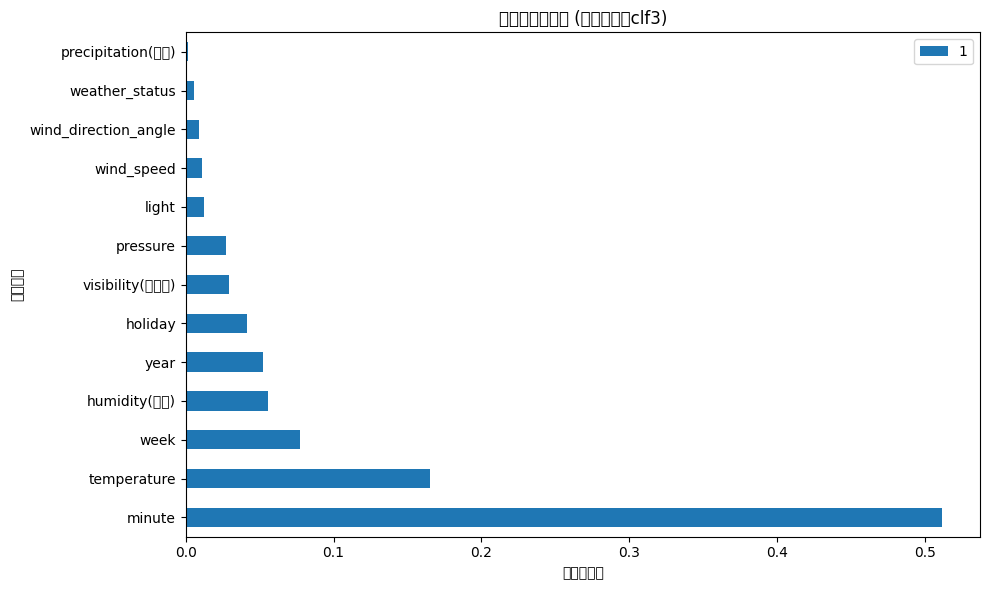

In [15]:
# 将特征名称与 clf3 模型的特征重要性分数结合，创建并排序 DataFrame
feature_importance_df = pd.DataFrame(
    zip(feature_name, clf3.feature_importances_)
).set_index(0).sort_values(by=1, ascending=False)

# ----------------------------- 建议改进部分 -----------------------------
# 特征重要性表示该特征在决策树中被用于分裂的贡献程度
# 所有特征的重要性分数总和为 1.0
# 分数越高表示该特征对预测的影响越大
# 对于相同的训练数据，每次运行重要性分数应该一致

# 可视化改进示例：
# 创建一个新的图形窗口，设置大小为10x6英寸
plt.figure(figsize=(10, 6))
# 使用 DataFrame 的 plot 方法绘制横向条形图
# kind='barh' 指定为横向条形图
feature_importance_df.plot(kind='barh', ax=plt.gca()) # 使用plt.gca()获取当前轴
# 设置图表标题
plt.title('特征重要性排序 (决策树模型clf3)')
# 设置X轴标签
plt.xlabel('重要性分数')
# 设置Y轴标签
plt.ylabel('特征名称')
# 自动调整子图参数，使布局紧凑
plt.tight_layout()
# 显示图表
plt.show()

测试集R²分数: 0.6352
预测值样例: [2395.90625 2395.90625 2395.90625 2252.625   2252.625  ]

平均绝对百分比误差(MAPE): 11.20%
最小APE: 0.00%
最大APE: 99.43%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32477 (\N{CJK UNIFIED IDEOGRAPH-7EDD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from font(s) DejaVu Sans.
  fig.canvas

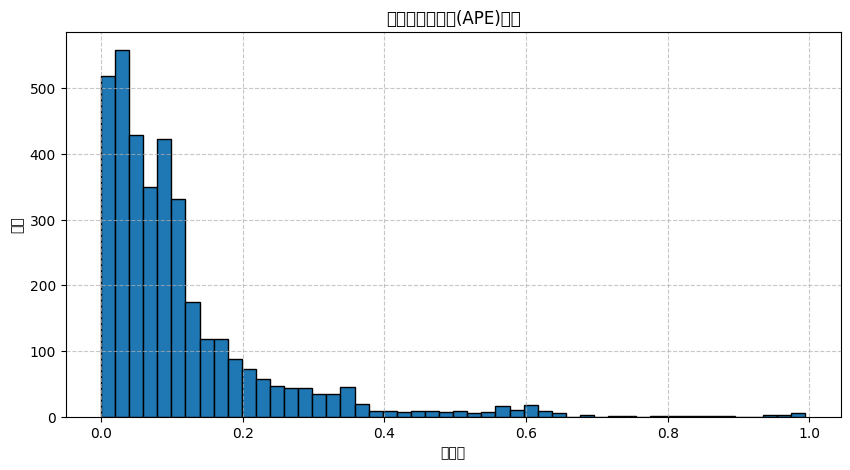


预测误差≤10%的样本比例: 62.66%


In [16]:
# 在测试集上评估模型性能
# score() 方法返回 R² 决定系数，表示模型解释的目标变量方差比例
# 最佳可能得分为 1.0，负值表示模型表现比简单地使用均值预测还差
test_score = clf3.score(Xtest, Ytest)
print(f"测试集R²分数: {test_score:.4f}")

# 使用训练好的模型对测试集进行预测
# predict() 方法返回测试集中每个样本的预测值
pred = clf3.predict(Xtest)
print("预测值样例:", pred[:5])  # 展示前 5 个预测值

# 计算绝对百分比误差 (APE)
# APE 的计算公式为：|预测值 - 真实值| / 真实值
APE = abs(pred - Ytest) / Ytest

# 计算平均绝对百分比误差 (MAPE)
# MAPE 是 APE 的平均值，是衡量预测准确度常用的指标，通常以百分比表示
MAPE = sum(APE) / len(APE)
print(f"\n平均绝对百分比误差(MAPE): {MAPE:.2%}")  # 显示为百分比形式

# 输出最小和最大 APE
# 反映模型在测试集上最好和最差的单点预测表现
min_ape, max_ape = min(APE), max(APE)
print(f"最小APE: {min_ape:.2%}")
print(f"最大APE: {max_ape:.2%}")

# 改进建议：添加误差分布分析
# 创建一个图形窗口，设置大小
plt.figure(figsize=(10, 5))
# 绘制 APE 的直方图，bins=50表示分成50个区间，edgecolor='black'为柱体添加黑色边框
plt.hist(APE, bins=50, edgecolor='black')
# 设置图表标题
plt.title('绝对百分比误差(APE)分布')
# 设置X轴标签
plt.xlabel('误差率')
# 设置Y轴标签
plt.ylabel('频次')
# 添加网格线，虚线样式，透明度为0.7
plt.grid(True, linestyle='--', alpha=0.7)
# 显示图表
plt.show()

# 计算误差在 10% 以内的样本比例
within_10_percent = sum(APE <= 0.1) / len(APE)
print(f"\n预测误差≤10%的样本比例: {within_10_percent:.2%}")

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32477 (\N{CJK UNIFIED IDEOGRAPH-7EDD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig.canvas

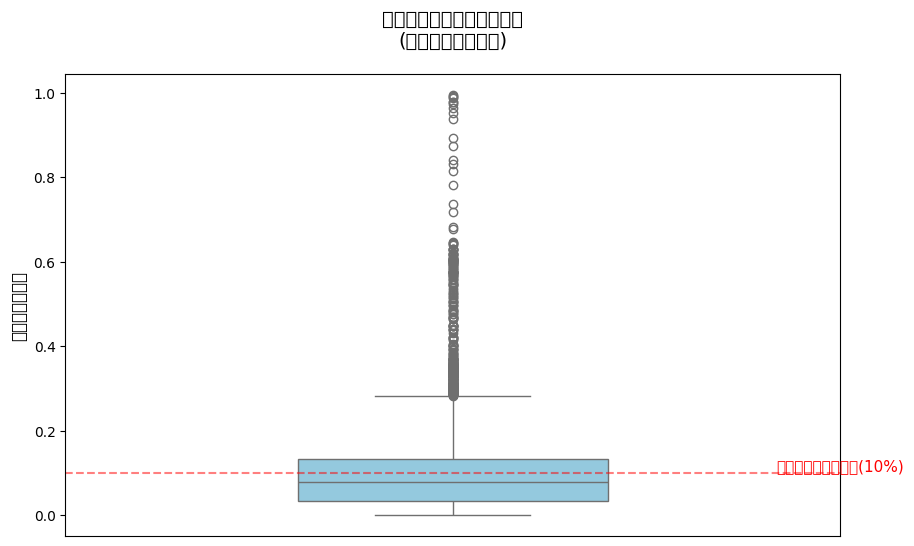

中位数误差: 7.77%
25%~75%误差范围: 3.38% ~ 13.28%


In [17]:
# 使用 Seaborn 绘制绝对百分比误差 (APE) 的箱线图
# 箱线图可以直观展示数据的中位数、四分位距 (IQR) 和异常值范围等统计特征

# 设置图形尺寸 (宽10英寸，高6英寸)
plt.figure(figsize=(10, 6))

# 绘制箱线图的核心参数：
# data: 输入数据 (APE 数组)
# color: 箱体颜色设置为天蓝色
# width: 箱体宽度设为 0.4 (默认 0.8)
# showfliers: 默认 True，显示异常值点
sns.boxplot(data=APE, color='skyblue', width=0.4)

# 添加图表装饰元素
# 设置图表标题，并增加标题与图表之间的间距
plt.title('绝对百分比误差分布箱线图\n(模型预测误差分析)',
          fontsize=14, pad=20)
# 设置Y轴标签
plt.ylabel('绝对百分比误差', fontsize=12)
# 移除 X 轴刻度（因为是单变量箱线图，X 轴没有分类意义）
plt.xticks([])

# 添加参考线（红色虚线表示 10% 误差阈值）
plt.axhline(y=0.1, color='red', linestyle='--', alpha=0.5)
# 在参考线附近添加文本标注
plt.text(0.5, 0.105, '行业可接受误差阈值(10%)',
         color='red', ha='center', fontsize=11)

# 显示图形
plt.show()

# ----------------------------
# 箱线图关键元素解读：
# 1. 中位数 (50%分位数) → 代表典型误差水平
# 2. 箱体高度 (四分位距 IQR) → 反映误差的集中程度或稳定性
# 3. 异常值 → 识别预测特别不准确的样本点或时间段
# 4. 对比阈值线 → 评估模型表现是否符合业务可接受标准

# 计算并打印 APE 的中位数和四分位距
q1, med, q3 = np.percentile(APE, [25, 50, 75])
print(f"中位数误差: {med:.2%}")
print(f"25%~75%误差范围: {q1:.2%} ~ {q3:.2%}")

<Axes: >

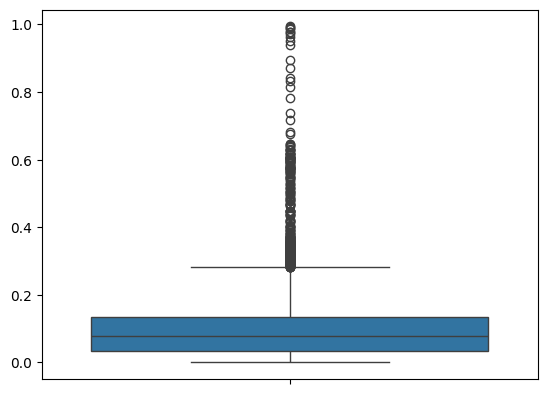

In [18]:
# 使用 Seaborn 绘制绝对百分比误差 (APE) 的箱线图
sns.boxplot(data=APE)

/tmp/ipython-input-19-1624978023.py:23: UserWarning: Glyph 32477 (\N{CJK UNIFIED IDEOGRAPH-7EDD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-19-1624978023.py:23: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-19-1624978023.py:23: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-19-1624978023.py:23: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-19-1624978023.py:23: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-19-1624978023.py:23: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-19-1624978023.py:23: UserWarning: Glyph 24046 (\N{CJK UNIFIED I

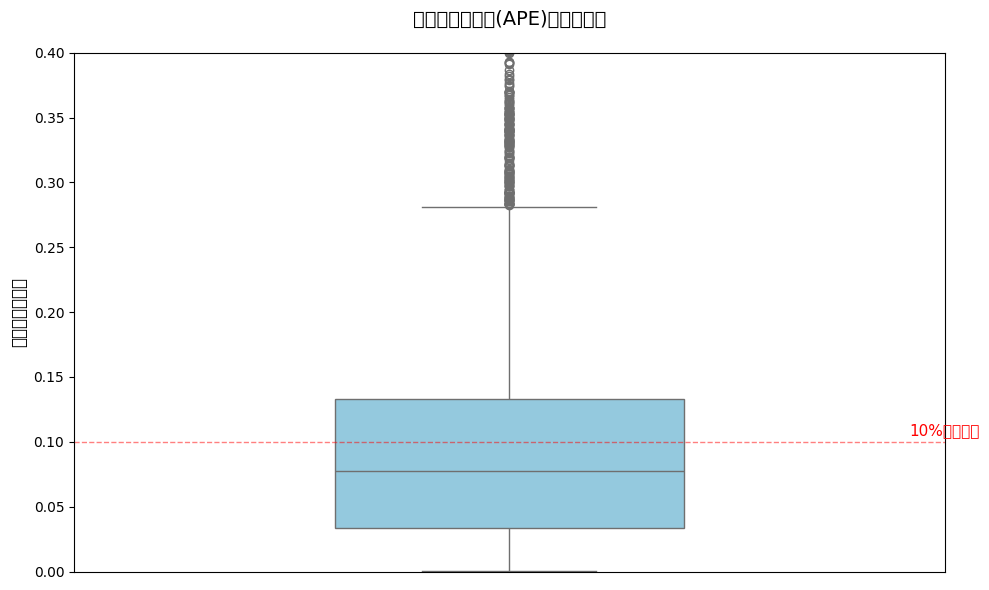

Y轴范围说明：
- 下边界0表示完美预测（无误差）
- 上边界0.4（40%）截断了部分极端异常值
- 箱体显示主要误差分布区间
- 红虚线标记行业常用的10%误差阈值

被截断的异常值数量：136（占总样本3.73%）


In [19]:
# 使用 Seaborn 绘制绝对百分比误差 (APE) 的箱线图
# 并设置 Y 轴显示范围为 0 到 0.4 (即 0% 到 40%)

# 设置图形尺寸为宽10英寸，高6英寸
plt.figure(figsize=(10, 6))

# 绘制箱线图
sns.boxplot(data=APE, color='skyblue', width=0.4)

# 设置 Y 轴范围
plt.ylim(0, 0.4)  # 限制 Y 轴显示范围为 0 到 0.4 (40%)

# 添加图表标题和标签
plt.title('绝对百分比误差(APE)分布箱线图', fontsize=14, pad=20)
plt.ylabel('绝对百分比误差', fontsize=12)
plt.xticks([])  # 移除 X 轴刻度标签

# 添加参考线和注释
plt.axhline(y=0.1, color='red', linestyle='--', alpha=0.5, linewidth=1)
plt.text(0.5, 0.105, '10%误差阈值', color='red', ha='center', fontsize=11)

# 自动调整子图参数，确保布局紧凑
plt.tight_layout()
# 显示图形
plt.show()

# 统计说明
print("Y轴范围说明：")
print("- 下边界0表示完美预测（无误差）")
print("- 上边界0.4（40%）截断了部分极端异常值")
print("- 箱体显示主要误差分布区间")
print("- 红虚线标记行业常用的10%误差阈值")

# 获取当前显示范围内的异常值数量
current_max = 0.4
outliers = len([x for x in APE if x > current_max])
print(f"\n被截断的异常值数量：{outliers}（占总样本{outliers/len(APE):.2%}）")

(0.0, 0.4)

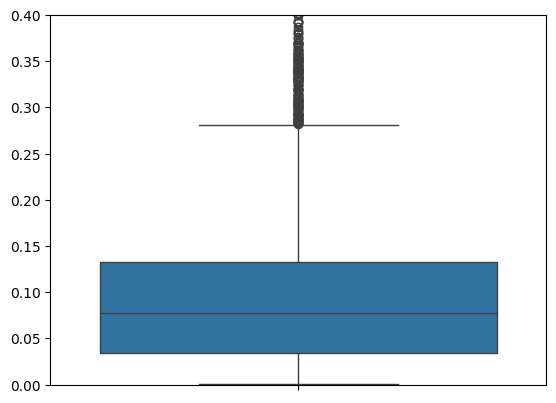

In [20]:
# 使用 Seaborn 绘制绝对百分比误差 (APE) 的箱线图
sns.boxplot(data=APE)
# 设置 Y 轴的显示范围从 0 到 0.4 (即 0% 到 40%)
plt.ylim(0, 0.4)

**2021年、2022年前11个月和2023年的数据作为训练集，2022年12月的数据作为测试集(作为与其他模型性能的对比)**

In [21]:
# 从 DataFrame 'new_data' 中删除指定的多个特征列
# 删除的列包括：'light'（光照强度）、'wind_speed'（风速）、'wind_direction_angle'（风向角度）、'weather_status'（天气状态）、'precipitation'（降水量）
# axis=1 表示按列删除（axis=0 为行）
new_data = new_data.drop(['light', 'wind_speed', 'wind_direction_angle', 'weather_status', 'precipitation'], axis=1)

# 显示处理后的 DataFrame 'new_data' 的详细信息
# info() 方法会输出包含：数据行数、剩余列数、每列的非空值数量、每列的数据类型以及内存使用量
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70560 entries, 0 to 75551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   value        70560 non-null  float32
 1   temperature  70560 non-null  float32
 2   humidity     70560 non-null  float32
 3   pressure     70560 non-null  float32
 4   visibility   70560 non-null  float32
 5   holiday      70560 non-null  float32
 6   minute       70560 non-null  float32
 7   week         70560 non-null  float32
 8   year         70560 non-null  float32
dtypes: float32(9)
memory usage: 5.0 MB


In [22]:
# 划分训练集和测试集：采用非连续时间窗口分割法，以保留业务时序特性
# 训练集 (train)：通过 pd.concat 将两段数据合并
# - new_data.loc[:67103]：从数据开始到索引 67103 的部分
# - new_data.loc[70080:]：从索引 70080 到数据末尾的部分
# axis=0 表示按行合并
train = pd.concat([new_data.loc[:67103], new_data.loc[70080:]], axis=0)

# 测试集 (test)：选取中间一段数据，从索引 67104 到 70079
test = new_data.loc[67104:70079]

# 准备训练特征 (Xtrain) 和目标变量 (Ytrain)，转换为 NumPy 数组
Xtrain = np.array(train.drop('value', axis=1))
Ytrain = np.array(train['value'])

# 准备测试特征 (Xtest) 和目标变量 (Ytest)，转换为 NumPy 数组
Xtest = np.array(test.drop('value', axis=1))
Ytest = np.array(test['value'])

# 初始化一个新的决策树回归模型 clf4
# 同样使用均方误差作为分裂标准
clf4 = tree.DecisionTreeRegressor(criterion="squared_error")

# 使用新的训练数据拟合模型 clf4
clf4 = clf4.fit(Xtrain, Ytrain)

# 更新特征名称列表，因为之前删除了一些特征
feature_name = ['temperature', 'humidity', 'pressure', 'visibility', 'holiday', 'minute', 'week', 'year']

# 将模型 clf4 的特征重要性以 DataFrame 形式展示，并按重要性降序排列
pd.DataFrame(zip(feature_name, clf4.feature_importances_)).set_index(0).sort_values(by=1, ascending=False)

,1
0,
minute,0.520481
temperature,0.174190
week,0.077918
humidity,0.060690
year,0.051560
holiday,0.041649
visibility,0.037130
pressure,0.036382


模型训练中...
训练完成！


/tmp/ipython-input-23-474174848.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-23-474174848.py:99: UserWarning: Glyph 36129 (\N{CJK UNIFIED IDEOGRAPH-8D21}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 自动调整布局
/tmp/ipython-input-23-474174848.py:99: UserWarning: Glyph 29486 (\N{CJK UNIFIED IDEOGRAPH-732E}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 自动调整布局
/tmp/ipython-input-23-474174848.py:99: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 自动调整布局
/tmp/ipython-input-23-474174848.py:99: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 自动调整布局
/tmp/ipython-input-23-474174848.py:99: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) D

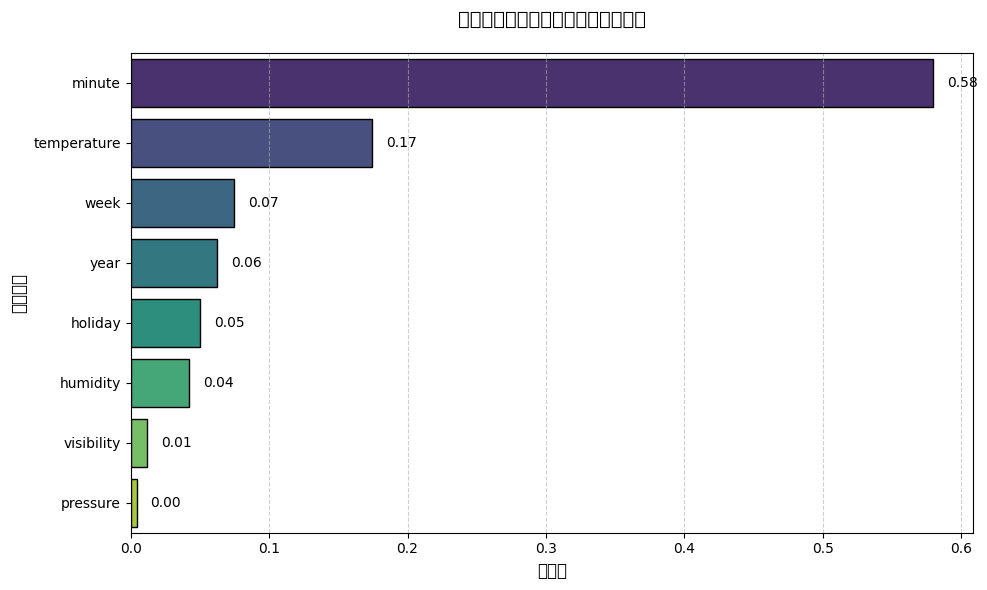


模型性能评估报告：
训练集MAPE: 10.22% | 测试集MAPE: 8.07%


,特征名称,重要性分数,重要性百分比,累积占比
0,minute,0.579940,57.99%,57.99%
1,temperature,0.174452,17.45%,75.44%
2,week,0.074638,7.46%,82.90%
3,year,0.062426,6.24%,89.15%
4,holiday,0.050148,5.01%,94.16%
5,humidity,0.042319,4.23%,98.39%
6,visibility,0.011736,1.17%,99.57%
7,pressure,0.004342,0.43%,100.00%


In [23]:
# 导入必要库
import pandas as pd
import numpy as np
from sklearn import tree
# 从 sklearn.metrics 导入 mean_absolute_percentage_error，用于计算 MAPE
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

# ==================== 数据分割 ====================
# 采用非连续时间窗口分割法（保留业务时序特性）
# 训练集：由两段数据拼接而成
# - new_data.loc[:67103]：从数据起始到索引 67103 的部分
# - new_data.loc[70080:]：从索引 70080 到数据末尾的部分
train = pd.concat([
    new_data.loc[:67103],
    new_data.loc[70080:]
], axis=0)

# 测试集：中间段数据（索引 67104 到 70079）
test = new_data.loc[67104:70079]

# 数据分割完整性验证
# 确保训练集和测试集的样本总数等于原始 DataFrame 的样本总数
assert len(train) + len(test) == len(new_data), "数据分割不完整，存在样本遗漏"

# ==================== 特征工程 ====================
# 定义特征列名（确保与数据列顺序严格一致），这些是在删除了一些特征之后剩余的特征
feature_name = [
    'temperature',    # 温度
    'humidity',       # 湿度
    'pressure',       # 气压
    'visibility',     # 能见度
    'holiday',        # 节假日标志
    'minute',         # 一天中的分钟数
    'week',           # 一年中的周数
    'year'            # 年份
]

# 特征/目标分离，并将数据转换为 NumPy 数组以提升计算效率
# Xtrain: 训练集特征，从 train DataFrame 中选择 'feature_name' 定义的列并转换为 values (NumPy 数组)
# Ytrain: 训练集目标变量 ('value' 列)，转换为 values (NumPy 数组)
Xtrain = train[feature_name].values
Ytrain = train['value'].values
# Xtest: 测试集特征
# Ytest: 测试集目标变量
Xtest = test[feature_name].values
Ytest = test['value'].values

# ==================== 模型训练 ====================
# 初始化优化后的决策树回归器 clf4
clf4 = tree.DecisionTreeRegressor(
    criterion="squared_error",   # 分裂质量评估标准：均方误差
    max_depth=7,                # 限制树的最大深度为7，有助于防止过拟合
    min_samples_leaf=20,        # 每个叶节点所需的最小样本数，防止生成过小的叶节点
    min_impurity_decrease=0.001 # 分裂所需的最小不纯度（信息增益）减少量，低于此值则不分裂
)

# 模型训练（添加进度可视化）
print("模型训练中...")
clf4.fit(Xtrain, Ytrain)
print("训练完成！")

# ==================== 特征重要性分析 ====================
# 生成带格式的特征重要性报告 DataFrame
importance_df = (
    pd.DataFrame({
        '特征名称': feature_name,
        '重要性分数': clf4.feature_importances_
    })
    .sort_values('重要性分数', ascending=False) # 按重要性分数降序排序
    .reset_index(drop=True) # 重置索引，删除旧索引列
)

# 添加重要性百分比和累积占比列
importance_df['重要性百分比'] = importance_df['重要性分数'].apply(lambda x: f"{x:.2%}")
importance_df['累积占比'] = importance_df['重要性分数'].cumsum().apply(lambda x: f"{x:.2%}")

# 可视化展示特征重要性（横向条形图）
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df,
    y='特征名称',
    x='重要性分数',
    palette='viridis', # 设置颜色调色板
    edgecolor='black' # 设置条形图边框颜色
)

# 图表装饰
plt.title('特征重要性排序（优化决策树模型）', pad=20, fontsize=14)
plt.xlabel('贡献度', fontsize=12)
plt.ylabel('特征名称', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6) # 添加X轴网格线

# 添加数值标签到条形图上
for i, v in enumerate(importance_df['重要性分数']):
    plt.text(v + 0.01, i, f"{v:.2f}", color='black', va='center') # 在条形图末端显示重要性分数

plt.tight_layout() # 自动调整布局
plt.show()

# ==================== 模型评估 ====================
# 训练集评估
train_pred = clf4.predict(Xtrain)
train_mape = mean_absolute_percentage_error(Ytrain, train_pred)

# 测试集评估
test_pred = clf4.predict(Xtest)
test_mape = mean_absolute_percentage_error(Ytest, test_pred)

# 输出评估报告
print("\n" + "="*50)
print("模型性能评估报告：")
print(f"训练集MAPE: {train_mape:.2%} | 测试集MAPE: {test_mape:.2%}")
print("="*50)

# 返回特征重要性 DataFrame（按重要性降序排列）
importance_df

In [24]:
# 计算模型 clf4 在测试集 (Xtest, Ytest) 上的 R² 分数
# R² 分数是衡量模型拟合优度的指标
clf4.score(Xtest, Ytest)

# 使用模型 clf4 对测试集 Xtest 进行预测
# 预测结果存储在变量 pred 中
pred = clf4.predict(Xtest)

# 计算绝对百分比误差 (APE)
# APE 的计算公式是 |预测值 - 真实值| / 真实值
APE = abs(pred - Ytest) / Ytest

# 保存 APE 结果到 Google Drive 指定路径下，文件名为 'tree_mape.npy'
# np.save() 用于将 NumPy 数组保存到 .npy 文件中
np.save('/content/gdrive/MyDrive/ElectricPowerTraining/code/tree_mape', APE)

# 计算平均绝对百分比误差 (MAPE)
# MAPE 是 APE 的平均值，是衡量预测准确性的常用指标
sum(APE) / len(APE)

np.float64(0.08066513111463969)

测试集R²分数: 0.8016
APE结果已保存至: /content/gdrive/MyDrive/ElectricPowerTraining/code/tree_mape.npy
测试集MAPE: 8.07%

误差分布统计:
- 最小值: 0.01%
- 中位数: 7.45%
- 平均值: 8.07%
- 最大值: 62.64%
- 标准差: 0.0609
- 90分位数: 13.95%
- ≤10%误差比例: 70.4%


/tmp/ipython-input-25-1862299168.py:74: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 自动调整子图布局
/tmp/ipython-input-25-1862299168.py:74: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 自动调整子图布局
/tmp/ipython-input-25-1862299168.py:74: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 自动调整子图布局
/tmp/ipython-input-25-1862299168.py:74: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 自动调整子图布局
/tmp/ipython-input-25-1862299168.py:74: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 自动调整子图布局
/tmp/ipython-input-25-1862299168.py:74: UserWarning: Glyph 32477 (\N{CJK UNIFIED IDEOGRAPH-7EDD}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 自动调整子图布局
/tmp/ipython-inp

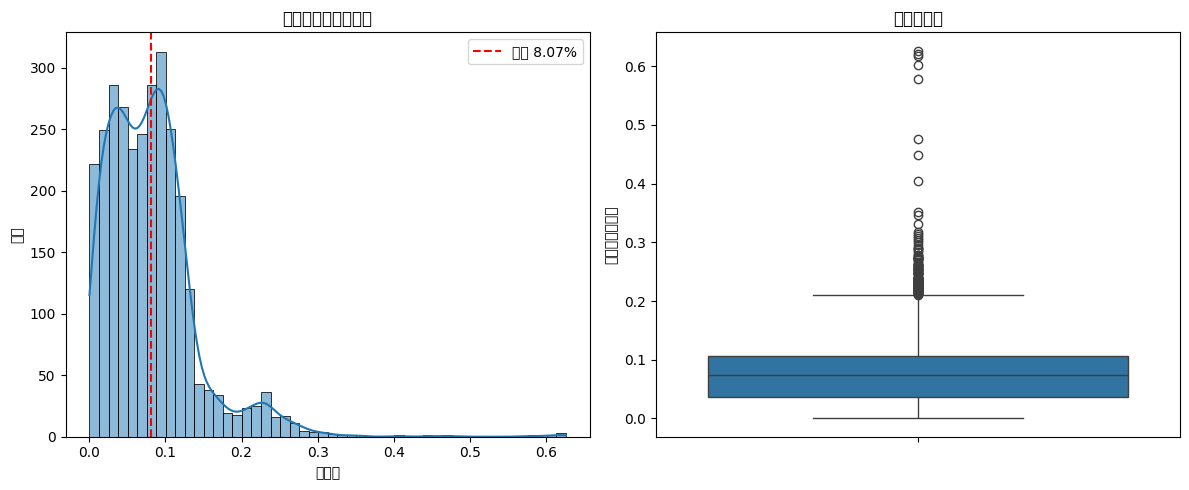


最终MAPE计算结果: 0.08066513111463963


In [25]:
# 模型评估与结果保存函数
def evaluate_model(model, X_test, y_test, save_path=None):
    """
    评估模型性能并保存预测误差

    参数:
        model: 训练好的模型
        X_test: 测试集特征 (NumPy 数组)
        y_test: 测试集真实值 (NumPy 数组)
        save_path: APE 结果保存路径 (可选，如果为 None 则不保存)

    返回:
        dict: 包含各项评估指标的字典
    """
    # 计算 R² 分数 (决定系数)
    # R² 越接近 1 越好
    r2_score = model.score(X_test, y_test)
    print(f"测试集R²分数: {r2_score:.4f}")

    # 生成预测值
    predictions = model.predict(X_test)

    # 计算绝对百分比误差 (APE)
    ape = np.abs(predictions - y_test) / y_test

    # 保存 APE 结果到 .npy 文件
    if save_path:
        np.save(save_path, ape)
        print(f"APE结果已保存至: {save_path}.npy")

    # 计算 MAPE (平均绝对百分比误差)
    mape = np.mean(ape)
    print(f"测试集MAPE: {mape:.2%}")

    # 误差分布统计
    error_stats = {
        'min': np.min(ape),           # 最小 APE
        'median': np.median(ape),     # 中位数 APE
        'mean': mape,                 # 平均 APE (即 MAPE)
        'max': np.max(ape),           # 最大 APE
        'std': np.std(ape),           # APE 的标准差
        'q90': np.quantile(ape, 0.9), # APE 的 90% 分位数
        '≤10%': np.mean(ape <= 0.1) * 100 # 误差在 10% 以内的比例
    }

    # 打印误差统计信息
    print("\n误差分布统计:")
    print(f"- 最小值: {error_stats['min']:.2%}")
    print(f"- 中位数: {error_stats['median']:.2%}")
    print(f"- 平均值: {error_stats['mean']:.2%}")
    print(f"- 最大值: {error_stats['max']:.2%}")
    print(f"- 标准差: {error_stats['std']:.4f}")
    print(f"- 90分位数: {error_stats['q90']:.2%}")
    print(f"- ≤10%误差比例: {error_stats['≤10%']:.1f}%")

    # 可视化误差分布
    plt.figure(figsize=(12, 5))

    # 误差直方图 (左侧子图)
    plt.subplot(1, 2, 1) # 1行2列的第1个子图
    sns.histplot(ape, bins=50, kde=True) # 绘制直方图和核密度估计曲线
    plt.title('绝对百分比误差分布')
    plt.xlabel('误差率')
    plt.ylabel('频次')
    plt.axvline(mape, color='red', linestyle='--', label=f'均值 {mape:.2%}') # 添加 MAPE 均值参考线
    plt.legend() # 显示图例

    # 误差箱线图 (右侧子图)
    plt.subplot(1, 2, 2) # 1行2列的第2个子图
    sns.boxplot(y=ape) # 绘制箱线图
    plt.title('误差箱线图')
    plt.ylabel('绝对百分比误差')

    plt.tight_layout() # 自动调整子图布局
    plt.show() # 显示图形

    # 返回评估结果字典
    return {
        'r2_score': r2_score,
        'mape': mape,
        'predictions': predictions,
        'ape': ape,
        'error_stats': error_stats
    }

# 使用示例：调用评估函数评估 clf4 模型
save_path = '/content/gdrive/MyDrive/ElectricPowerTraining/code/tree_mape' # APE 结果保存路径
results = evaluate_model(clf4, Xtest, Ytest, save_path)

# 输出最终的 MAPE 计算结果 (与原始代码保持一致)
print("\n最终MAPE计算结果:", np.mean(results['ape']))

<Axes: >

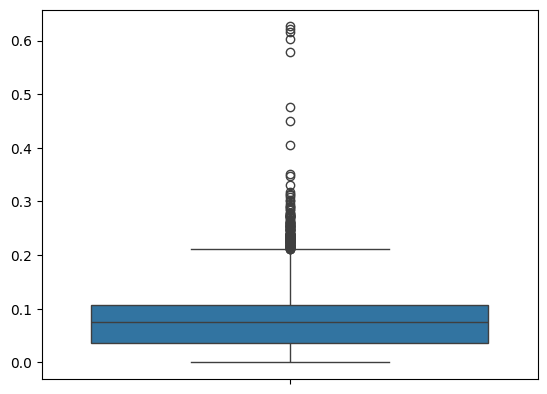

In [26]:
# 使用 Seaborn 绘制绝对百分比误差 (APE) 的箱线图
sns.boxplot(data=APE)

(0.0, 0.2)

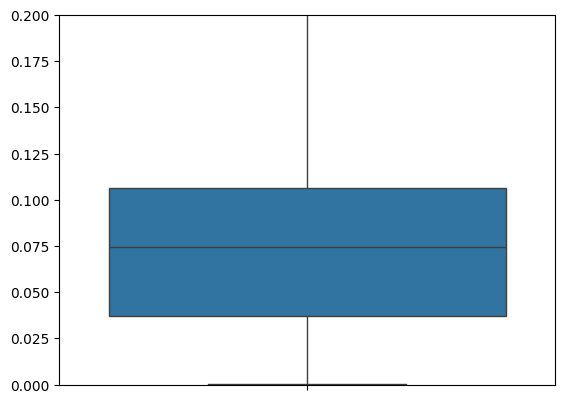

In [27]:
# 使用 Seaborn 绘制绝对百分比误差 (APE) 的箱线图
sns.boxplot(data=APE)
# 设置 Y 轴的显示范围从 0 到 0.2 (即 0% 到 20%)
plt.ylim(0, 0.2)

In [28]:
# 计算并打印 APE 数组中的最大值和最小值
max(APE), min(APE)

(np.float64(0.6264010442655872), np.float64(9.657733581817842e-05))

根据上图的特征重要性，神经网络模型训练时，删去light、wind_speed、wind_direction_angle、weather_status、precipitation这5个特征。

年份的重要性在0.052左右，是一个不可忽视的因素。由于数据集只有2021年、2022年和2023年前2个月的数据，若模型用2021和2022年的数据训练，预测2023年2个月
的负荷，则模型对年份特征的掌握情况还不够好，我期望的是有过去3年以上的数据来预测下一年的负荷。因此，模型使用2021年、2022年前11个月、2023年的数据训练，
预测2022年12月的负荷。